<h2>Implementasi ANN (fully conmected layer) menggunakan keras pada pengenalan angka</h2>

<h3>Implementasi arsitektur fully connected layer</h3>

In [1]:
#Load data
from tensorflow import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#Define Model
from keras.models import Sequential
from keras.layers import Flatten, Dense
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [11]:
#Compile Model, Fit Model, Save Model, dan Evaluasi Model
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))
model1.save('my_model1.h5')
model1.evaluate(X_test,y_test)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0457 - acc: 0.9871 - val_loss: 0.0918 - val_acc: 0.9724
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0401 - acc: 0.9885 - val_loss: 0.0903 - val_acc: 0.9726
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0356 - acc: 0.9899 - val_loss: 0.0940 - val_acc: 0.9715
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0317 - acc: 0.9914 - val_loss: 0.0877 - val_acc: 0.9740
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0286 - acc: 0.9922 - val_loss: 0.0919 - val_acc: 0.9748
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0265 - acc: 0.9925 - val_loss: 0.0877 - val_acc: 0.9756
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0230 - acc: 0.9940 - val_loss: 0.0934 - val_acc: 0.9747
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.

[0.09596344083547592, 0.9732000231742859]

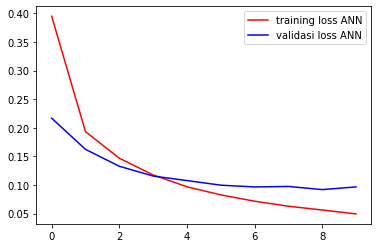

In [4]:
#Visualiasasi Evaluasi Model
import matplotlib.pyplot as plt
epochs = range(10)
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [5]:
#Load Model dan Prediction
import numpy as np
from tensorflow.keras.models import load_model
model_simpan = load_model('my_model1.h5')
pred = model_simpan.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


<h3>Implementasi arsitektur CNN pada pengenalan angka</h3>

In [6]:
#Define Model CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model2 = Sequential()
model2.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1), padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [7]:
#Compile Model, Fit Model, Save Model, dan Evaluasi Model CNN
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history2 = model2.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))
model2.save('my_model2.h5')
model2.evaluate(X_test,y_test)

Epoch 1/10
600/600 [==============================] - 35s 57ms/step - loss: 0.2320 - acc: 0.9291 - val_loss: 0.0701 - val_acc: 0.9782
Epoch 2/10
600/600 [==============================] - 33s 54ms/step - loss: 0.0661 - acc: 0.9797 - val_loss: 0.0482 - val_acc: 0.9842
Epoch 3/10
600/600 [==============================] - 33s 54ms/step - loss: 0.0470 - acc: 0.9855 - val_loss: 0.0430 - val_acc: 0.9858
Epoch 4/10
600/600 [==============================] - 33s 55ms/step - loss: 0.0374 - acc: 0.9880 - val_loss: 0.0366 - val_acc: 0.9871
Epoch 5/10
600/600 [==============================] - 33s 55ms/step - loss: 0.0299 - acc: 0.9910 - val_loss: 0.0340 - val_acc: 0.9879
Epoch 6/10
600/600 [==============================] - 35s 58ms/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0300 - val_acc: 0.9894
Epoch 7/10
600/600 [==============================] - 33s 56ms/step - loss: 0.0207 - acc: 0.9931 - val_loss: 0.0274 - val_acc: 0.9906
Epoch 8/10
600/600 [==============================] - 33s 56ms

[0.034160953015089035, 0.9884999990463257]

In [8]:
#Load Model CNN dan Prediction
import numpy as np
from keras.models import load_model
model_simpan2 = load_model('my_model2.h5')
pred = model_simpan2.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3


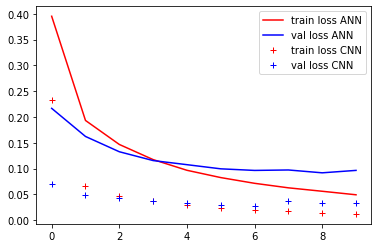

In [9]:
#Contoh Implementasi pada Pengenalan Angka
import matplotlib.pyplot as plt
epochs = range(10)
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
plt.plot(epochs,loss1,'r',label='train loss ANN')
plt.plot(epochs,val_loss1,'b',label='val loss ANN')
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(epochs,loss2,'r+',label='train loss CNN')
plt.plot(epochs,val_loss2,'b+',label='val loss CNN')
plt.legend()